# Dataset 6

### Imported Libraries

In [1]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Dataset Representation

In [2]:
# Loading the dataset
df = pd.read_csv("Dataset6.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 301 entries, Unnamed: 0 to 299
dtypes: float64(300), int64(1)
memory usage: 235.3 KB


There are a total of 100 observations and 301 variables in the dataset. Each observation represents a movie being rated by people, with its value being a float data type from the range 1.0 to 5.0. It can be presumed that 1.0 is the lowest rating while 5.0 is the highest which is typically the scale in most rating systems. On the other hand, each variable represents a rating of a specific user to a movie, except the first variable representing a unique identifier for each observation from the values 0-99.

### Delete this later
<img src="dataRepresentation.png">

actually we can probably presume that the row is a movie/book/whatever product then each col is the consumer?



It's probably a dataset of ratings for a certain type of product, not sure yet whether the column or row is the "consumer", will find out once we get the average and see which has less variation whether row or col?

## Exploratory Data Analysis

### Delete this later
<img src="eda1.png">
<img src="eda2.png">

### Possible Questions:
<li> What movie is the highest/lowest rating?</li>
<li> What is the distribution of the average rating of each user?</li>
<li> Which user has the highest average ratings?</li>

### What movies have the highest and lowest ratings?

In [4]:
movie_average = df.mean(axis = 1).sort_values(ascending = False)
top_10 = movie_average.head(10)
bott_10 = movie_average.tail(10)

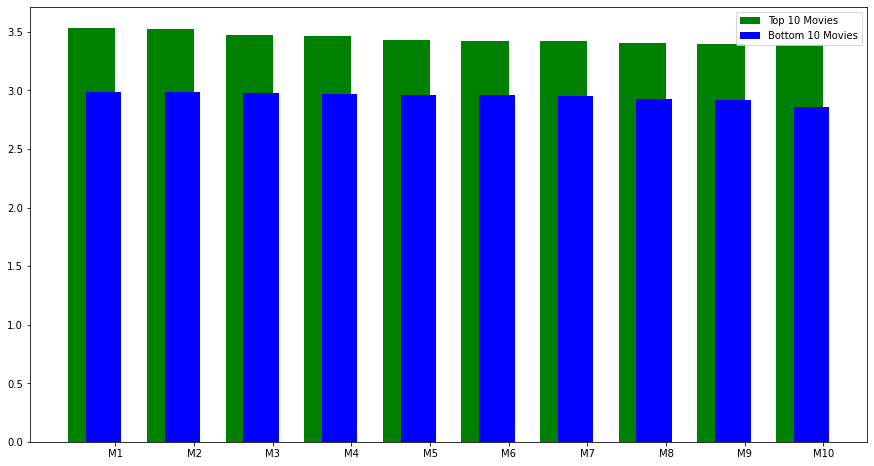

In [31]:
width = 0.6

indices = np.arange(len(top_10))
plt.figure(figsize=(15, 8)) 
ax_top = plt.bar(indices, 
        top_10,
        width = width, 
        color = 'g',
        label='Top 10 Movies')
ax_bott = plt.bar([i + 0.25 * width for i in indices],
        bott_10, 
        width = 0.75 * width, 
        color='b', 
        label='Bottom 10 Movies')

plt.xticks(indices+width/2, 
           ['M{}'.format(i + 1) for i in range(len(top_10))] )

plt.legend()

plt.show()

### What is the distribution of the average rating of each user?<br>Which user has the highest average ratings?

In [6]:
user_average = df.mean()
user_average.drop(user_average.index[0],inplace = True)
user_average


0      3.113636
1      3.189873
2      2.727273
3      3.047059
4      2.987952
         ...   
295    2.975000
296    3.180723
297    3.211765
298    3.047619
299    2.777778
Length: 300, dtype: float64

Text(0, 0.5, 'Frequency of Ratings')

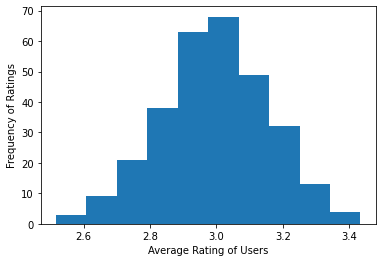

In [7]:
user_average_plot = user_average.plot.hist()
user_average_plot.set_xlabel("Average Rating of Users")
user_average_plot.set_ylabel("Frequency of Ratings")

As seen from the graph above, the average rating of users approximately follows a normal distribution. The average rating of users falls at around 2.4 to 3.4, with about 3.0 as the highest occurring rating.

In [8]:
gen_user = user_average.sort_values(ascending = False).head(10)
ind = list(gen_user.index)
gen_user

38     3.433735
26     3.393258
134    3.392857
141    3.362637
157    3.337349
44     3.320988
100    3.305882
41     3.296296
226    3.292135
45     3.279070
dtype: float64

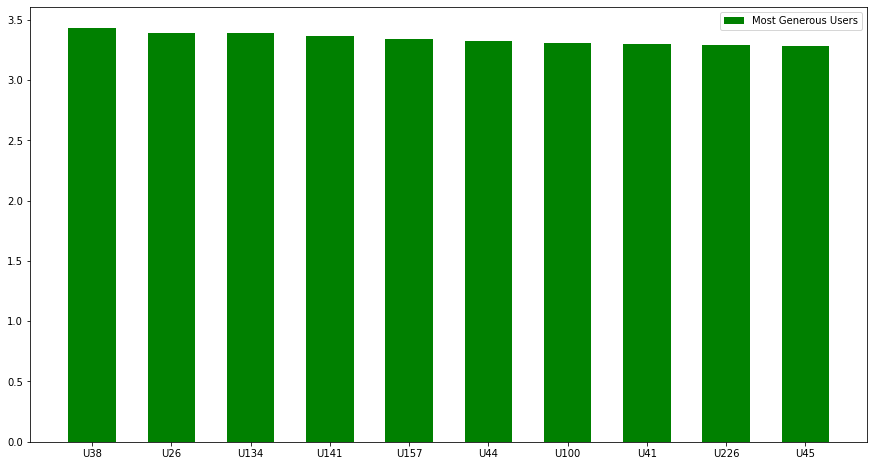

In [9]:
width = 0.6

indices = np.arange(len(gen_user))
plt.figure(figsize=(15, 8)) 
ax_top = plt.bar(indices, 
        gen_user,
        width = width, 
        color = 'g',
        label='Most Generous Users')

plt.xticks(indices, 
           ['U{}'.format(i) for i in ind] )

plt.legend()

plt.show()

As shown by the data, the highest rating that a user gives on average is ~3.4/5 with others closely following dropping to ~3.2 on the 10th ranking "most generous" user.

## Data Mining

### Delete this later
<img src="dataMining.png">

In [30]:
from collaborative_filtering import CollaborativeFiltering

In [19]:
cfilter = CollaborativeFiltering(5)

In [20]:
mean = cfilter.get_row_mean(df)
print(mean.round(2))

0     2.86
1     3.17
2     3.10
3     2.92
4     2.98
      ... 
95    3.43
96    3.28
97    3.25
98    3.40
99    3.23
Length: 100, dtype: float64


In [21]:
normalized_df = cfilter.normalize_data(df, mean)
normalized_df.round(2)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,-2.86,-1.86,NaN,0.14,-1.86,2.14,1.14,-1.86,-0.86,NaN,...,NaN,-1.86,-0.86,1.14,2.14,0.14,-0.86,0.14,NaN,-1.86
1,-2.17,-0.17,1.83,-2.17,1.83,-0.17,-0.17,-2.17,1.83,0.83,...,-0.17,0.83,-0.17,0.83,1.83,-2.17,1.83,1.83,NaN,-0.17
2,-1.10,1.90,0.90,0.90,-0.10,NaN,1.90,-0.10,0.90,-1.10,...,-0.10,0.90,1.90,-2.10,0.90,NaN,1.90,0.90,-2.10,NaN
3,0.08,0.08,NaN,2.08,-1.92,NaN,0.08,0.08,2.08,-0.92,...,1.08,NaN,-0.92,1.08,1.08,-0.92,-0.92,-1.92,-0.92,-0.92
4,1.02,NaN,0.02,-0.98,0.02,0.02,NaN,-1.98,NaN,-0.98,...,-1.98,1.02,-0.98,2.02,0.02,-0.98,-0.98,-1.98,NaN,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,91.57,0.57,NaN,1.57,-2.43,NaN,-2.43,1.57,-0.43,0.57,...,1.57,NaN,1.57,-2.43,0.57,-0.43,NaN,1.57,-1.43,NaN
96,92.72,0.72,NaN,NaN,-2.28,NaN,-2.28,1.72,-2.28,-1.28,...,NaN,0.72,1.72,0.72,1.72,-2.28,-0.28,NaN,1.72,-1.28
97,93.75,0.75,-0.25,-1.25,-2.25,-0.25,1.75,0.75,-2.25,-1.25,...,NaN,-1.25,1.75,NaN,-0.25,0.75,1.75,-1.25,NaN,-0.25
98,94.60,1.60,-1.40,0.60,-0.40,1.60,-2.40,0.60,0.60,-1.40,...,1.60,-0.40,-0.40,0.60,NaN,NaN,1.60,0.60,-0.40,NaN



Similarity of movie to itself

sim_0_0 -> similarity of movie 0 to movie 0

In [22]:
sim_0_0 = cfilter.get_cosine_similarity(normalized_df.iloc[0, :], normalized_df.iloc[0, :])
print('Cosine similarity:')
print(round(sim_0_0, 2))

Cosine similarity:
1.0


Similarity of two movies

sim_0_1 -> similarity of movie 0 to movie 1

In [23]:
sim_0_1 = cfilter.get_cosine_similarity(normalized_df.iloc[0, :], normalized_df.iloc[1, :])
print('Cosine similarity:')
print(round(sim_0_1, 2))

Cosine similarity:
0.05


Similarity of 1 movie to all other movies

sim_0_other -> similarity of movie 0 to all other movies

In [24]:
sim_0_other = cfilter.get_cosine_similarity(normalized_df.iloc[1, :], normalized_df.iloc[1:, :])
print('Cosine similarity:')
print(round(sim_0_other, 2))
# print(round(sim_0_other[sim_0_other > 0], 2))

Cosine similarity:
1     1.00
2    -0.05
3    -0.11
4     0.04
5    -0.03
      ... 
95   -0.09
96   -0.09
97   -0.12
98   -0.08
99   -0.09
Length: 99, dtype: float64


top k movies similar to movie 0, where k = 5

In [26]:
movie_0 = df.iloc[0, :]
other_movies = df.iloc[1:, :]
sim_movies = cfilter.get_k_similar(other_movies, movie_0)
sim_movies

4     0.054977
1     0.054482
21    0.013455
14    0.011484
7     0.009761
dtype: float64

## Insights and Conclusions


### Delete this later
<img src= "insightsAndConclusions.png">

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d2f843f-28ea-4c66-bb88-99e8103a958d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>